# Preliminaries

In [2]:
!pip install statsmodels

     ---------------------------------------- 9.4/9.4 MB 3.6 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels import datasets
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.ensemble import IsolationForest
from statsmodels.tsa.stattools import adfuller

In [4]:
df = pd.read_csv('C:/Users/MANCY036/Downloads/Eskwelabs/consolidated_csv_selfsched_03KAL_G01.csv')
df.head()

,RUN_TIME,MKT_TYPE,REGION_NAME,ZONE_NAME,RESOURCE_NAME,TIME_INTERVAL,START_TIME,END_TIME,MP_NAME,SELF_SCHED_MW,Unnamed: 10
0,07/29/2021 10:00:00 PM,RTD,CLUZ,SLUZON,03KAL_G01,07/29/2021 10:05:00 PM,07/29/2021 10:00:00 PM,07/29/2021 10:05:00 PM,PSALM,-160.0,NaN
1,07/29/2021 10:05:00 PM,RTD,CLUZ,SLUZON,03KAL_G01,07/29/2021 10:10:00 PM,07/29/2021 10:05:00 PM,07/29/2021 10:10:00 PM,PSALM,-160.0,NaN
2,07/29/2021 10:10:00 PM,RTD,CLUZ,SLUZON,03KAL_G01,07/29/2021 10:15:00 PM,07/29/2021 10:10:00 PM,07/29/2021 10:15:00 PM,PSALM,-160.0,NaN
3,07/29/2021 10:15:00 PM,RTD,CLUZ,SLUZON,03KAL_G01,07/29/2021 10:20:00 PM,07/29/2021 10:15:00 PM,07/29/2021 10:20:00 PM,PSALM,-160.0,NaN
4,07/29/2021 10:20:00 PM,RTD,CLUZ,SLUZON,03KAL_G01,07/29/2021 10:25:00 PM,07/29/2021 10:20:00 PM,07/29/2021 10:25:00 PM,PSALM,-160.0,NaN


# Data Preprocessing

In [5]:
# transform date column into a datetime column
df['RUN_TIME'] = pd.to_datetime(df['RUN_TIME'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df.head()

,RUN_TIME,MKT_TYPE,REGION_NAME,ZONE_NAME,RESOURCE_NAME,TIME_INTERVAL,START_TIME,END_TIME,MP_NAME,SELF_SCHED_MW,Unnamed: 10
0,2021-07-29 22:00:00,RTD,CLUZ,SLUZON,03KAL_G01,07/29/2021 10:05:00 PM,07/29/2021 10:00:00 PM,07/29/2021 10:05:00 PM,PSALM,-160.0,NaN
1,2021-07-29 22:05:00,RTD,CLUZ,SLUZON,03KAL_G01,07/29/2021 10:10:00 PM,07/29/2021 10:05:00 PM,07/29/2021 10:10:00 PM,PSALM,-160.0,NaN
2,2021-07-29 22:10:00,RTD,CLUZ,SLUZON,03KAL_G01,07/29/2021 10:15:00 PM,07/29/2021 10:10:00 PM,07/29/2021 10:15:00 PM,PSALM,-160.0,NaN
3,2021-07-29 22:15:00,RTD,CLUZ,SLUZON,03KAL_G01,07/29/2021 10:20:00 PM,07/29/2021 10:15:00 PM,07/29/2021 10:20:00 PM,PSALM,-160.0,NaN
4,2021-07-29 22:20:00,RTD,CLUZ,SLUZON,03KAL_G01,07/29/2021 10:25:00 PM,07/29/2021 10:20:00 PM,07/29/2021 10:25:00 PM,PSALM,-160.0,NaN


In [151]:
# # Filtering the dataset to see 2023
# df = df[(df['RUN_TIME'].dt.year == 2023)]
# df.head()

,RUN_TIME,MKT_TYPE,REGION_NAME,ZONE_NAME,RESOURCE_NAME,TIME_INTERVAL,START_TIME,END_TIME,MP_NAME,SELF_SCHED_MW,Unnamed: 10
162973,2023-01-01 00:05:00,RTD,CVIS,PANAY,08SLWIND_G01,1/1/2023 12:10:00 AM,1/1/2023 12:05:00 AM,1/1/2023 12:10:00 AM,TAREC,9.7,NaN
162974,2023-01-01 00:10:00,RTD,CVIS,PANAY,08SLWIND_G01,1/1/2023 12:15:00 AM,1/1/2023 12:10:00 AM,1/1/2023 12:15:00 AM,TAREC,9.7,NaN
162975,2023-01-01 00:15:00,RTD,CVIS,PANAY,08SLWIND_G01,1/1/2023 12:20:00 AM,1/1/2023 12:15:00 AM,1/1/2023 12:20:00 AM,TAREC,9.7,NaN
162976,2023-01-01 00:20:00,RTD,CVIS,PANAY,08SLWIND_G01,1/1/2023 12:25:00 AM,1/1/2023 12:20:00 AM,1/1/2023 12:25:00 AM,TAREC,9.7,NaN
162977,2023-01-01 00:25:00,RTD,CVIS,PANAY,08SLWIND_G01,1/1/2023 12:30:00 AM,1/1/2023 12:25:00 AM,1/1/2023 12:30:00 AM,TAREC,9.7,NaN


In [6]:
duplicate_labels = df.index[df.index.duplicated()]
print("Duplicate Labels:", duplicate_labels)

Duplicate Labels: Index([], dtype='int64')


In [7]:
df = df[~df.index.duplicated(keep='first')]
df.head()

,RUN_TIME,MKT_TYPE,REGION_NAME,ZONE_NAME,RESOURCE_NAME,TIME_INTERVAL,START_TIME,END_TIME,MP_NAME,SELF_SCHED_MW,Unnamed: 10
0,2021-07-29 22:00:00,RTD,CLUZ,SLUZON,03KAL_G01,07/29/2021 10:05:00 PM,07/29/2021 10:00:00 PM,07/29/2021 10:05:00 PM,PSALM,-160.0,NaN
1,2021-07-29 22:05:00,RTD,CLUZ,SLUZON,03KAL_G01,07/29/2021 10:10:00 PM,07/29/2021 10:05:00 PM,07/29/2021 10:10:00 PM,PSALM,-160.0,NaN
2,2021-07-29 22:10:00,RTD,CLUZ,SLUZON,03KAL_G01,07/29/2021 10:15:00 PM,07/29/2021 10:10:00 PM,07/29/2021 10:15:00 PM,PSALM,-160.0,NaN
3,2021-07-29 22:15:00,RTD,CLUZ,SLUZON,03KAL_G01,07/29/2021 10:20:00 PM,07/29/2021 10:15:00 PM,07/29/2021 10:20:00 PM,PSALM,-160.0,NaN
4,2021-07-29 22:20:00,RTD,CLUZ,SLUZON,03KAL_G01,07/29/2021 10:25:00 PM,07/29/2021 10:20:00 PM,07/29/2021 10:25:00 PM,PSALM,-160.0,NaN


In [8]:
df = df[['RUN_TIME', 'SELF_SCHED_MW']]

In [9]:
# Get max value per day
data_max = df.groupby(df['RUN_TIME'].dt.date)['SELF_SCHED_MW'].agg(['max']).reset_index()
data_max.columns = ['Date', 'max_SELF_SCHED_MW']
data_max['Date'] = pd.to_datetime(data_max['Date'])
data_max.set_index('Date', inplace=True)
data_max.head()

,max_SELF_SCHED_MW
Date,
2021-07-29,-160.0
2021-07-30,-160.0
2021-07-31,-160.0
2021-08-01,-160.0
2021-08-02,-160.0


In [10]:
data_max.isnull().any()

max_SELF_SCHED_MW    False
dtype: bool

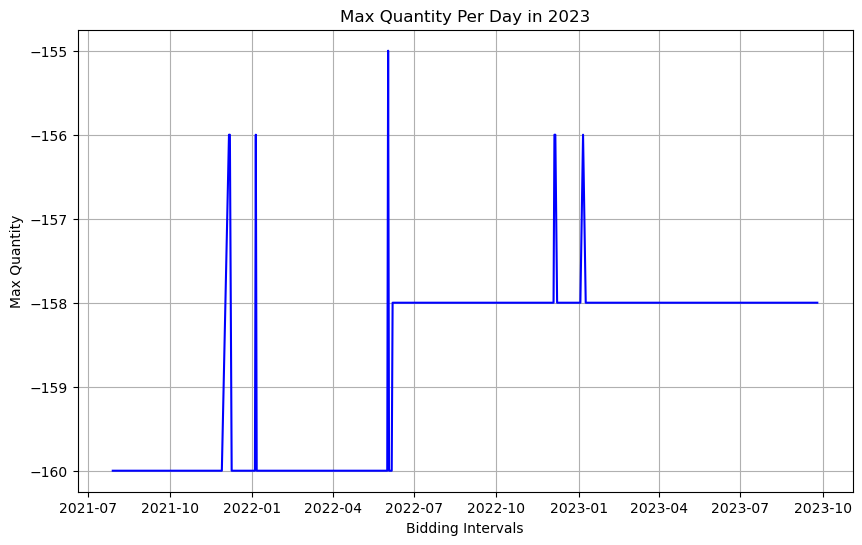

In [11]:
# Plot the time series as a line plot
plt.figure(figsize=(10, 6))
plt.plot(data_max, linestyle='-', color='b', label='Max Quantity')
plt.title('Max Quantity Per Day in 2023')
plt.xlabel('Bidding Intervals')
plt.ylabel('Max Quantity')
plt.grid(True)
plt.show()

# Stationarity Test

In [12]:
def adf_test(data):
    adf_test = adfuller(data)
    adf_result = pd.Series(adf_test[0:4], index=['Test Statistic','p-value','N Lags Used',\
                                                'N Observations Used'])
    for key,value in adf_test[4].items():
            adf_result['Critical Value (%s)'%key] = value

    return adf_result

In [13]:
adf_test(data_max.diff()[1:])

Test Statistic         -1.744071e+01
p-value                 4.711085e-30
N Lags Used             5.000000e+00
N Observations Used     4.760000e+02
Critical Value (1%)    -3.444163e+00
Critical Value (5%)    -2.867631e+00
Critical Value (10%)   -2.570014e+00
dtype: float64

In [ ]:
# final_df_daily passed the test. Conlusion: Stationary

# Checking Trend

In [16]:
# Set window (the higher the window value, the smoother the graph)
WINDOW = 30
rolling_df = data_max.rolling(WINDOW).mean().shift(1)
rolling_df

,max_SELF_SCHED_MW
Date,
2021-07-29,NaN
2021-07-30,NaN
2021-07-31,NaN
2021-08-01,NaN
2021-08-02,NaN
...,...
2023-09-21,-158.0
2023-09-22,-158.0
2023-09-23,-158.0


Text(0, 0.5, 'Maximum Capacity')

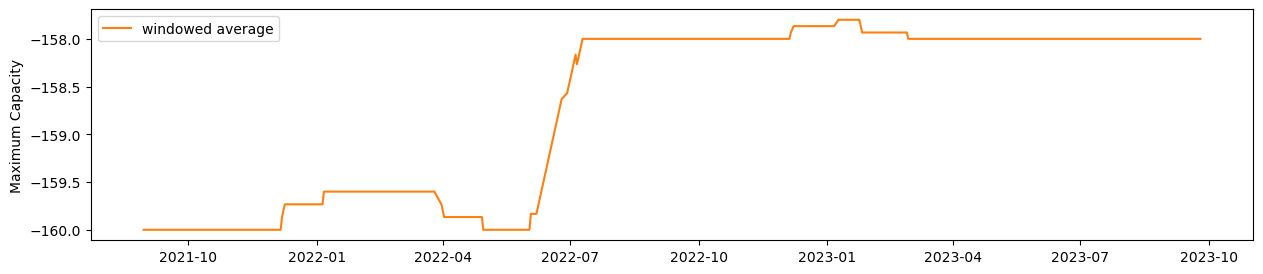

In [18]:
# plot the forecast
fig = plt.figure(figsize=(15,3))
plt.plot(rolling_df, color='C1', label='windowed average')
plt.legend()
plt.ylabel("Maximum Capacity")

In [19]:
WINDOW = 7
rolling_df2 = rolling_df.rolling(WINDOW).mean().shift(1)
rolling_df2

,max_SELF_SCHED_MW
Date,
2021-07-29,NaN
2021-07-30,NaN
2021-07-31,NaN
2021-08-01,NaN
2021-08-02,NaN
...,...
2023-09-21,-158.0
2023-09-22,-158.0
2023-09-23,-158.0


Text(0, 0.5, 'Maximum Capacity')

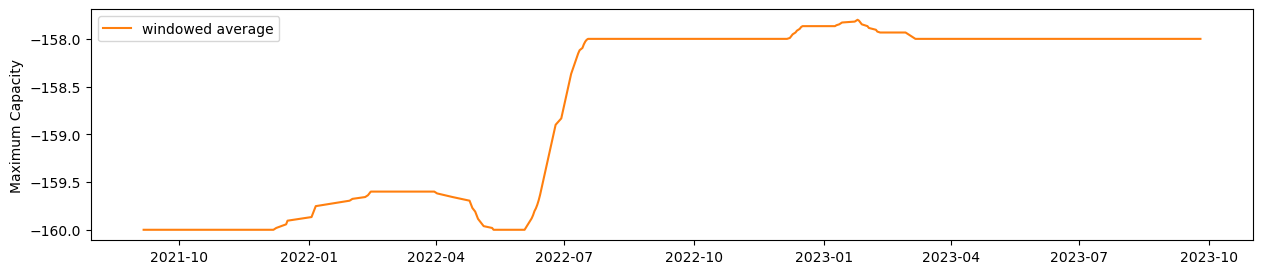

In [20]:
# plot the forecast
fig = plt.figure(figsize=(15,3))
plt.plot(rolling_df2, color='C1', label='windowed average')
plt.legend()
plt.ylabel("Maximum Capacity")

# Forecasting (Prophet)

In [21]:
#split dataset to training and test sets
train_df = data_max['2021-01-01':'2023-06-30']
test_df = data_max['2023-07-01':'2023-09-25']

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def show_errors(y_true, y_pred):
    return pd.DataFrame({'RMSE': root_mean_squared_error(y_true,y_pred),\
                                            'MAE':mean_absolute_error(y_true,y_pred),\
                                            'MAPE': mean_absolute_percentage_error(y_true,y_pred)}, index=[0])

In [23]:
!pip install prophet

     ---------------------------------------- 13.3/13.3 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 93.0/93.0 kB 5.2 MB/s eta 0:00:00
     -------------------------------------- 854.3/854.3 kB 3.9 MB/s eta 0:00:00


In [256]:
from prophet import Prophet

In [257]:
# Create Prophet model
model = Prophet()

# Rename the columns to fit Prophet's requirements
input_df = train_df.copy().reset_index()
input_df = input_df.rename(columns={'Date': 'ds', 'max_SELF_SCHED_MW': 'y'})

# Fit model to data
model.fit(input_df)

20:25:58 - cmdstanpy - INFO - Chain [1] start processing
20:25:58 - cmdstanpy - INFO - Chain [1] done processing


In [258]:
# Generate future predictions
future = model.make_future_dataframe(periods=len(test_df))

# Make predictions
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-06-26,19.560744,-10.478342,18.522506,19.560744,19.560744,-15.288939,-15.288939,-15.288939,-0.667983,-0.667983,-0.667983,-14.620956,-14.620956,-14.620956,0.0,0.0,0.0,4.271805
1,2021-06-27,19.566355,-8.617718,18.078118,19.566355,19.566355,-14.973672,-14.973672,-14.973672,-0.597252,-0.597252,-0.597252,-14.376419,-14.376419,-14.376419,0.0,0.0,0.0,4.592683
2,2021-06-28,19.571966,-9.397878,19.017599,19.571966,19.571966,-14.835302,-14.835302,-14.835302,-0.782002,-0.782002,-0.782002,-14.053300,-14.053300,-14.053300,0.0,0.0,0.0,4.736664
3,2021-06-29,19.577577,-6.810161,22.395238,19.577577,19.577577,-12.285765,-12.285765,-12.285765,1.365846,1.365846,1.365846,-13.651611,-13.651611,-13.651611,0.0,0.0,0.0,7.291812
4,2021-06-30,19.583187,-7.218708,20.423399,19.583187,19.583187,-13.133597,-13.133597,-13.133597,0.039209,0.039209,0.039209,-13.172806,-13.172806,-13.172806,0.0,0.0,0.0,6.449591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,2023-09-21,25.601785,5.112629,32.911236,25.587387,25.615929,-6.920286,-6.920286,-6.920286,0.212715,0.212715,0.212715,-7.133001,-7.133001,-7.133001,0.0,0.0,0.0,18.681499
817,2023-09-22,25.610284,4.548329,34.530977,25.595652,25.624667,-6.539470,-6.539470,-6.539470,0.429467,0.429467,0.429467,-6.968938,-6.968938,-6.968938,0.0,0.0,0.0,19.070813
818,2023-09-23,25.618782,3.711291,33.037807,25.603743,25.633406,-7.481911,-7.481911,-7.481911,-0.667983,-0.667983,-0.667983,-6.813928,-6.813928,-6.813928,0.0,0.0,0.0,18.136871
819,2023-09-24,25.627281,3.581758,33.295465,25.611937,25.642168,-7.266897,-7.266897,-7.266897,-0.597252,-0.597252,-0.597252,-6.669645,-6.669645,-6.669645,0.0,0.0,0.0,18.360384


In [259]:
forecast_df = forecast[['ds','yhat']].rename(columns={'ds':'date','yhat1':'streams'}).set_index('date')['2023-07-01':]
forecast_df

,yhat
date,
2023-07-01,11.331562
2023-07-02,11.999377
2023-07-03,12.478909
2023-07-04,15.351876
2023-07-05,14.803608
...,...
2023-09-21,18.681499
2023-09-22,19.070813
2023-09-23,18.136871


Text(0, 0.5, 'Daily Max Capacity')

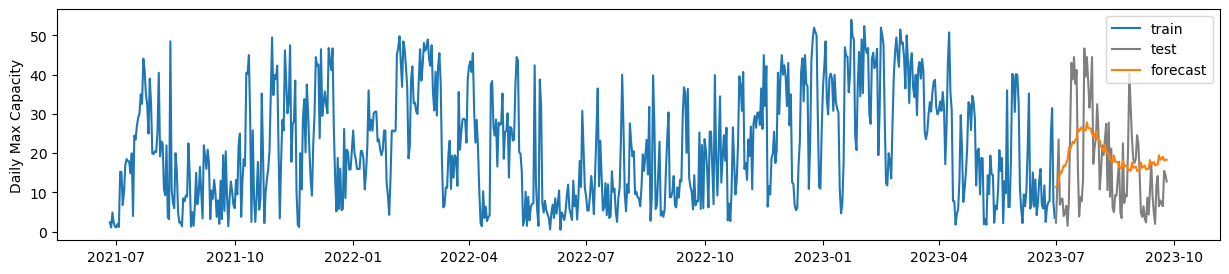

In [265]:
# plot the forecast results
fig = plt.figure(figsize=(15,3))

plt.plot(train_df, color='C0', label='train')
plt.plot(test_df, color='C7', label='test')
plt.plot(forecast_df, color='C1', label='forecast')
plt.legend()
plt.ylabel("Daily Max Capacity")

In [264]:
show_errors(test_df,forecast_df)

,RMSE,MAE,MAPE
0,11.135918,9.566935,125.327551


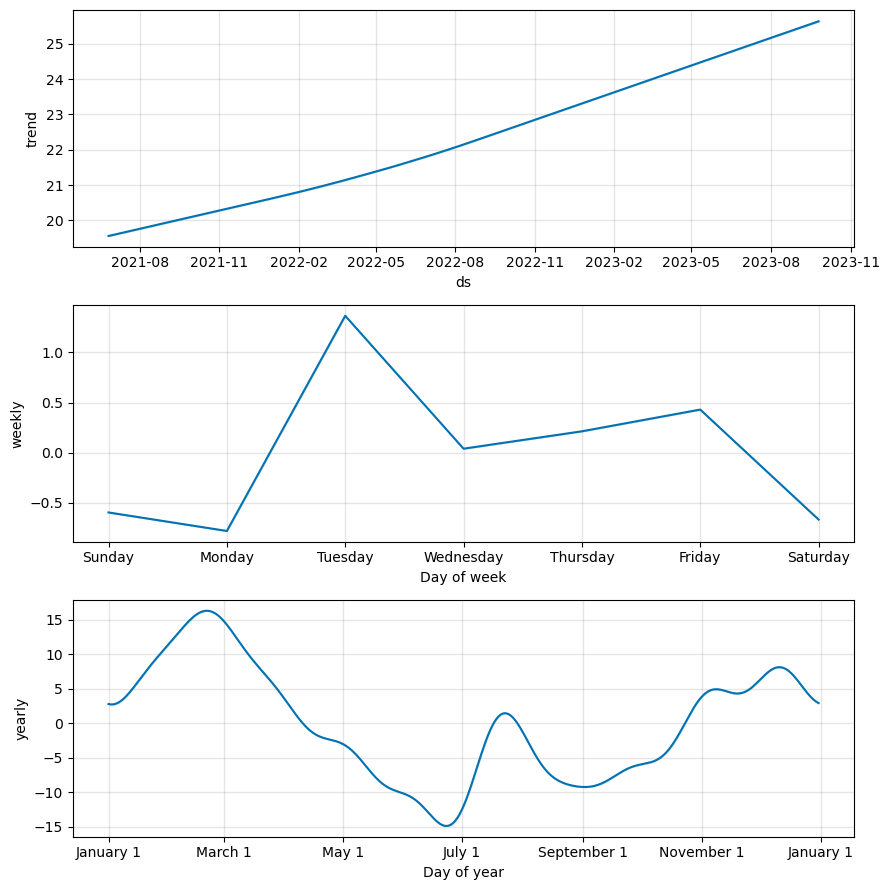

In [268]:
fig_components = model.plot_components(forecast)

# Final approach

In [222]:
# Drop columns
# Fill NaNs
# Filter to 2023 data
# Normalize quantity values
# Get max capacity per bidding interval
# Daily aggregation
# TSL decomposition
# Stationary test
# Train-test split
# Neural netrok approach